# Laboratório de Computação Aplicada - Trabalho final

Alexandre Algemiro de Almeida

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# A dívida pública do RJ


O quão grande é a dívida pública do Estado do Rio de Janeiro? \
Sabemos que o Estado do RJ passa por uma situação delicada financeiramente, mas quais são as proporções desse problema?\
Segundo uma reportagem do G1, em 2019, a dívida consolidada líquida do estado representava 282% da receita, muito acima do limite estabelecido pela lei de responsabilidade fiscal, que é de 200%. A dívida é perigosa e se torna um fardo para as gerações futuras - ou mesmo a nossa, caso a bomba exploda na nossa vez. Essa dívida é custosa ao extremo, pois o dinheiro que é destinado para quitá-la poderia ser destinado a garantir serviços públicos de qualidade. Então é de suma importância garantir a saúde fiscal do Estado.\
Mas essa dívida está crescendo ou diminuindo? Qual foi a dívida mais volumosa já registrada? Qual foi o impacto da Covid-19? Como está o RJ em relação a outros estados semelhantes? Como está a saúde fiscal do RJ? Qual a perspectiva atual de recuperação? Essas são perguntas que esse trabalho visa explorar. \
\
Fontes ao final do trabalho.

# Como o RJ está lidando com a dívida?

Importando a série da dívida líquida do Estado do Rio de Janeiro

In [ ]:
codigo=15547
url='http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo)
divLiqRJ=pd.read_json(url)
divLiqRJ=divLiqRJ.rename(columns={'valor':'Dívida líquida','data':'Data'})
divLiqRJ['Data']=pd.to_datetime(divLiqRJ['Data'],format='%d/%m/%Y')

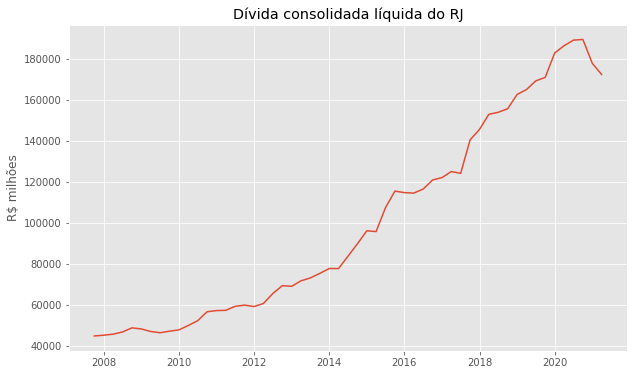

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.plot(divLiqRJ['Data'],divLiqRJ['Dívida líquida'])
plt.title('Dívida consolidada líquida do RJ')
plt.ylabel('R$ milhões')
plt.show()

Podemos ver a tendência crescente da dívida líquida do Estado do Rio desde 2008, com uma reversão após 2020, o que é contraintuitivo, considerando que a pandemia de COVID-19 gerou muitos gastos públicos para combater a doença.

Vamos visualizar quando ocorreu o maior registro da dívida.

In [ ]:
divLiqRJ.loc[divLiqRJ['Dívida líquida']==max(divLiqRJ['Dívida líquida'])]

,Data,Dívida líquida
52,2020-10-01,189747.83


Portanto, o valor máximo, que ocorreu em 01/10 de 2020, após os piores momentos da pandemia, foi mais de 189 bilhões de reais. Desde então a dívida está caindo.

Qual foi o último registro?

In [ ]:
divLiqRJ.iloc[-1]

Data              2021-04-01 00:00:00
Dívida líquida                 172634
Name: 54, dtype: object

Portanto, o último registro, que ocorreu em 01/04 de 2021, foi mais de 172 bilhões de reais.

Quanto a dívida já foi reduzida desde seu máximo em outubro de 2020?

In [ ]:
divLiqRJ.loc[divLiqRJ['Dívida líquida']==max(divLiqRJ['Dívida líquida'])]['Dívida líquida'].values[0]-divLiqRJ.iloc[-1]['Dívida líquida']

17113.929999999993

Portanto, o Governo do RJ já conseguiu reduzir a dívida em mais de 17 bilhões de reais, que corresponde a 9% da dívida de outubro de 2020. Cabe ressaltar que isso foi feito durante a pandemia de Covid.

Vamos visualizar a evolução dos valores anuais da dívida.

In [ ]:
lista=[]
for i in divLiqRJ.index:
  if i%4==1:
    lista.append(divLiqRJ.iloc[i]['Dívida líquida'])
lista.append(divLiqRJ.iloc[54]['Dívida líquida'])

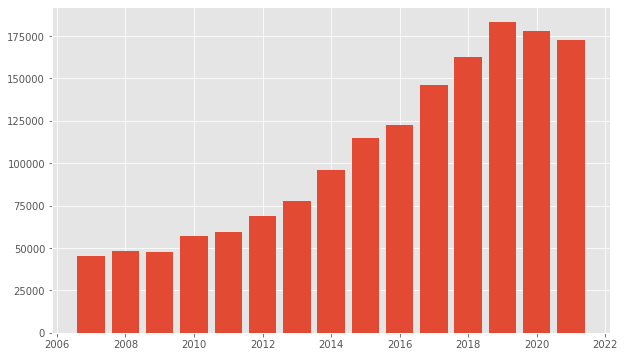

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(list(range(2007,2022)),lista)
plt.show()

Vamos investigar agora as variações anuais.

In [ ]:
lista2=lista.copy()
lista2.remove(lista2[0])
lista.remove(lista[-1])
lista2=np.array(lista2)
lista=np.array(lista)
diferencas=lista2-lista
diferencas=list(diferencas)

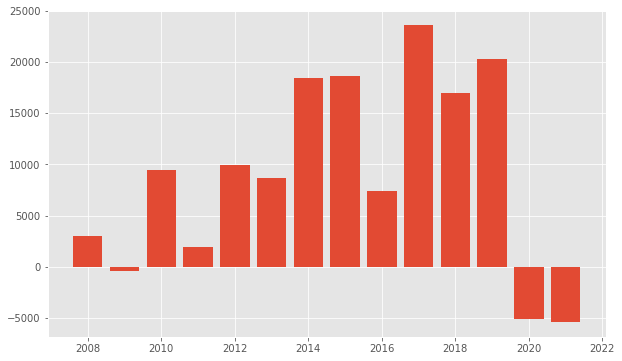

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(list(range(2008,2022)),diferencas)
plt.show()

Como o gráfico acima aponta, o *crescimento* da dívida líquida do RJ, com algumas exceções, quase que aumentava a cada ano. Sinal de descontrole das contas públicas. \\
As reduções da dívida, por outro lado, ainda são recentes e tímidas.

Mas o quão significativa é essa dívida? Para isso precisamos olhar, primeiro, para o valor relativo ao PIB. Do IBGE, dispomos apenas dos PIBs dos estados brasileiros de 2018. O PIB de 2018 do RJ foi de 758.859 milhões de reais. Todas as fontes inclusas ao final do trabalho.


Agora, vamos ver qual foi a dívida líquida de 2018.

In [ ]:
divLiqRJ[divLiqRJ['Data']==('2019-01-01 00:00:00')]

,Data,Dívida líquida
45,2019-01-01,162851.03


In [ ]:
162851/758859

0.21459981366762468

Portanto, a dívida do RJ em 2018 representava 21,4% do seu PIB

Se quisermos comparar a dívida do RJ com a de algum outro estado, precisamos escolher um que tenha um PIB semelhante. Não faria sentido comparar o Rio de Janeiro com o Acre ou com São Paulo. Minas Gerais, em 2018, tinha um PIB de 614.876 milhões de reais. Agora, vamos comparar graficamente as dívidas do RJ com MG

Importando a série da dívida líquida de MG

In [ ]:
codigo=15539 # Dívida líquida do Governo do Estado de Minas Gerais
url='http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo)
divLiqMG=pd.read_json(url)
divLiqMG=divLiqMG.rename(columns={'valor':'Dívida líquida','data':'Data'})
divLiqMG['Data']=pd.to_datetime(divLiqMG['Data'],format='%d/%m/%Y')

Text(0.5, 1.0, 'Comparação dívida consolidada líquida RJ e MG')

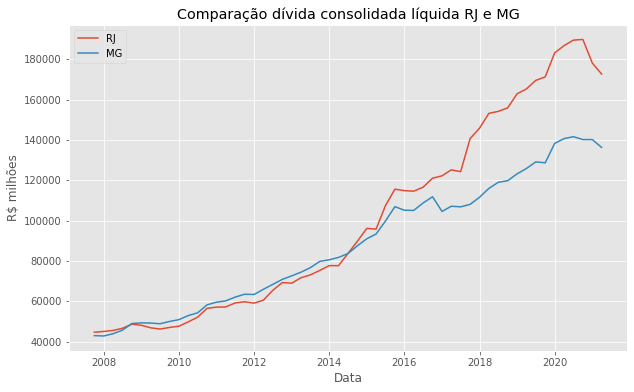

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x=divLiqRJ['Data'],y=divLiqRJ['Dívida líquida'],label='RJ').set_ylabel('R$ milhões')
sns.lineplot(x=divLiqMG['Data'],y=divLiqMG['Dívida líquida'],palette='Blues',label='MG').set_title("Comparação dívida consolidada líquida RJ e MG")

Perceba como os dois estados sempre tiveram números semelhantes de dívida líquida, mas o RJ começou a se distanciar de MG ainda em 2015. Depois disso, sua dívida passou a ser substancialmente maior que a de MG a cada ano.

Para concluir essa comparação, vejamos a relação dívida PIB de MG em 2018.

In [ ]:
divLiqMG[divLiqMG['Data']==('2019-01-01 00:00:00')]

,Data,Dívida líquida
45,2019-01-01,123215.34


In [ ]:
123215.34/614876

0.20039055028981453

Portanto, a dívida do MG em 2018 representava 20% do seu PIB. Número próximo do RJ.

Por fim, vamos visualizar um pouco melhor situação fiscal do RJ por meio de seus resultados nominais e primários.

Resultado nominal é a diferença entre as receitas totais (inclusive de aplicações financeiras) e as despesas totais (inclusive despesas com juros), em determinado período. Configura-se deficit nominal se o resultado for negativo, ou superavit nominal, se positivo.

Resultado primário é a diferença entre receitas primárias e despesas primárias. Configura-se deficit primário se o resultado for negativo, ou superavit primário, se positivo.

Importando as séries dos resultados nominal e primário do Estado do Rio de Janeiro

In [ ]:
codigo=15466 # Necessidades de financiamento do Governo do Estado do RJ - Resultado nominal - Fluxo acumulado no ano
url='http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo)
resNomRJ=pd.read_json(url)
resNomRJ=resNomRJ.rename(columns={'valor':'Resultado Nominal','data':'Data'})
resNomRJ['Data']=pd.to_datetime(resNomRJ['Data'],format='%d/%m/%Y')

In [ ]:
codigo=15439 # Necessidades de financiamento do Governo do Estado do RJ - Resultado primário - Fluxo acumulado no ano
url='http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo)
resPrimRJ=pd.read_json(url)
resPrimRJ=resPrimRJ.rename(columns={'valor':'Resultado Primário','data':'Data'})
resPrimRJ['Data']=pd.to_datetime(resPrimRJ['Data'],format='%d/%m/%Y')

Text(0.5, 1.0, 'Resultado nominal e primário RJ')

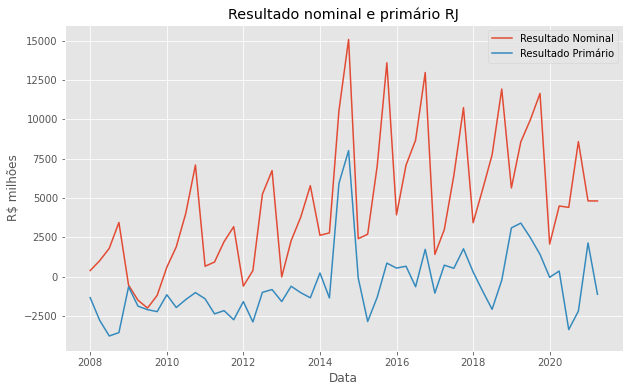

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x=resNomRJ['Data'],y=resNomRJ['Resultado Nominal'],label='Resultado Nominal').set_ylabel('R$ milhões')
sns.lineplot(x=resPrimRJ['Data'],y=resPrimRJ['Resultado Primário'],palette='Blues',label='Resultado Primário').set_title("Resultado nominal e primário RJ")

Como podemos ver os dois gráficos possuem formas semelhantes, mas diferem, principalmente, pela contabilização dos juros e aplicações financeiras no cálculo do resultado nominal.

Se pegarmos o último trimestre, teremos o acumulado no ano. Vamos elaborar esse gráfico anual para os resultados primários.

In [ ]:
lista3=[]
for i in resPrimRJ.index:
  if i%4==0:
    lista3.append(resPrimRJ.iloc[i]['Resultado Primário'])
lista3.append(resPrimRJ.iloc[53]['Resultado Primário'])

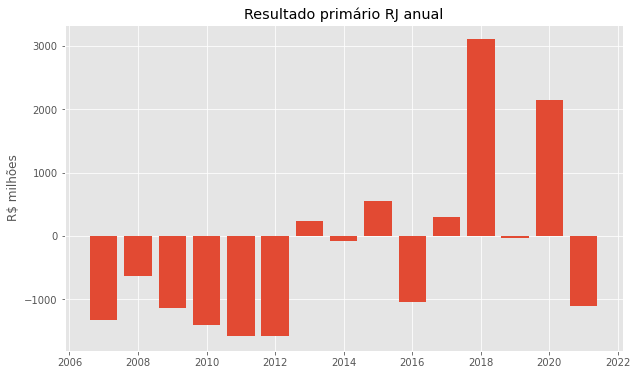

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Resultado primário RJ anual')
plt.ylabel('R$ milhões')
plt.bar(list(range(2007,2022)),lista3)
plt.show()

Observa-se que o RJ está caminhando para uma reestruturação das contas públicas, com muitas dificuldades. Isso fica claro com os resultados primários dos últimos 5 anos, com a exceção do último resultado, devido à pandemia. Além disso, vimos que há tendência recente de redução da dívida líquida, o que corrobora essa conclusão.\
A situação fiscal do Estado do Rio de Janeiro já atingiu proporções muito negativas, e ainda levará muitos anos para que esse problema seja de fato resolvido. O caminho é longo e dependerá de muita vontade política, pois dívidas costumam ser passadas para gerações futuras.\
Portanto, o RJ precisará de muito planejamento fiscal e uma boa equipe econômica para resolver esse desafio nos próximos anos.

# Fontes e Referências

https://www12.senado.leg.br/orcamentofacil/6.-classificacoes-orcamentarias/resultado-primario-e-resultado-nominal \
https://www.congressonacional.leg.br/legislacao-e-publicacoes/glossario-orcamentario/-/orcamentario/termo/resultado_nominal \
https://www.ibge.gov.br/explica/pib.php \
https://g1.globo.com/rj/rio-de-janeiro/noticia/2020/02/04/divida-do-rj-bate-recorde-e-fica-282percent-acima-da-receita-limite-da-lei-de-responsabilidade-e-de-200percent.ghtml